In [119]:
%matplotlib inline

## Setup GPU Device

In [120]:
import random

In [121]:
import os
#Set GPU IDs for training:
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

In [122]:
import dgl
def build_circuit_graph_undirected(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    g.add_edges(dst, src)
    return g

def build_circuit_graph_directed_sd(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    return g

def build_circuit_graph_directed_ds(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(dst, src)
    return g

### Choose Number of Training Samples

### Train Test Split

In [123]:
import random
random.seed(0)
training_size = 30
training_idx = random.sample(list(range(5,65)), training_size) #exclude 4-bit adders
test_idx = [item for item in list(range(5,65)) if item not in training_idx]

## Pick Training Data

In [124]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
dir = '/home/gpu-user-02/hdd/LT-user/Adder_Classification/main/preprocessing/processed_training_data'

trainset=[]
labels=[]
#for filename in os.listdir(dir):
np.random.seed(1)
sample_size = 10
# training_idx = np.random.randint(4,64,10)
training_idx_1 = np.random.choice(training_idx, size=sample_size, replace=False)
# training_idx_2 = np.random.choice(training_idx, size=sample_size, replace=False)
# training_idx_3 = np.random.choice(training_idx, size=sample_size, replace=False)
# training_idx_4 = np.random.choice(training_idx, size=sample_size, replace=False)

training_idx_2 = training_idx_1
training_idx_3 = training_idx_1
training_idx_4 = training_idx_1
# training_idx_1 = [6]
# training_idx_2 = [6]
# training_idx_3 = [6]
# training_idx_4 = [6]
print(training_idx_1,training_idx_2,training_idx_3,training_idx_4)

[23 58 24 11 18 44  9 61 54 39] [23 58 24 11 18 44  9 61 54 39] [23 58 24 11 18 44  9 61 54 39] [23 58 24 11 18 44  9 61 54 39]


### Prepare Training and Test Data

In [163]:
for idx in range(len(training_idx_1)):
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(training_idx_1[idx])+"bit"+j+'.csv'
        filename2 = "cla_"+str(training_idx_2[idx])+"bit"+j+'.csv'
        filename3 = "csa_"+str(training_idx_3[idx])+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(training_idx_4[idx])+"bit"+j+'.csv'
        if(filename.find("node_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        
        if(filename3.find("node_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    trainset.append(g)
    labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    trainset.append(g2)
    labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3,edge_list3)
    trainset.append(g3)
    labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4,edge_list4)
    trainset.append(g4)
    labels.append(label_list4[0])

for i in labels:
    i[0] = int(i[0])

print(labels)

[[1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3]]


### Visualize Training Data

In [164]:
# graph = trainset[14]
# label=labels[14][0]

# fig, ax = plt.subplots()
# G=graph.to_networkx()
# pos=nx.spring_layout(G)
# nx.draw(G,pos)
# nx.draw_networkx_labels(G,pos, ax=ax)
# ax.set_title('Class: {:f}'.format(label))
# plt.show()

### Apply random shuffle to training set

In [165]:
##apply random shuffle on the trainset
np.random.seed(0)
randomize = np.arange(len(trainset))
np.random.shuffle(randomize)
labels_shuffled=[]
trainset_shuffled=[]
for i in range (len(randomize)):
    labels_shuffled.append(labels[randomize[i]])
    trainset_shuffled.append(trainset[randomize[i]])

In [166]:
len(trainset_shuffled)

80

In [167]:
import dgl

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

In [168]:
import dgl.function as fn
import torch
import torch.nn as nn

# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')

### Readout and classification

In [169]:
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()

        self.layers = nn.ModuleList([
            GCN(in_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float().cuda()
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
#         hg = torch.median(h,0).values
#         print(hg)
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)

### Setup and training

In [170]:
import torch.optim as optim
from torch.utils.data import DataLoader

### Make Training Results Deterministic

In [171]:
# import torch
# torch.manual_seed(0)
# #CuDNN:
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

## Set Training Epoch

In [172]:
training_epoch = 80 #original = 1500 for 1 training sample 500 for 20 samples
initial_lr = 0.001

In [173]:
# Create model
#model = Classifier(1, 256, trainset.num_classes)
import time

model = Classifier(1, 256, 4)
model.cuda()
loss_func = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters(), lr = initial_lr)
# optimizer = optim.SGD(model.parameters(), lr = initial_lr, momentum=0.9, weight_decay=5e-4)

model.train()

labels_shuffled = torch.LongTensor(labels_shuffled).cuda()

epoch_losses = []

#start timer:
t0 = time.time()

for epoch in range(training_epoch):
    model.train()
    epoch_loss = 0
    for iter, bg in enumerate(trainset_shuffled):
        prediction=torch.zeros(1,4,dtype=torch.float64).cuda()
        prediction[0] = model(bg)

        loss = loss_func(prediction, labels_shuffled[iter])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)

training_time = time.time() - t0

print('Finished training. Training time = {:.4f} Seconds'.format(training_time))

#     if (epoch%5==0):
#         model.eval()
#         eval_bg = dgl.batch(trainset_shuffled)
#         eval_labels = torch.tensor(labels_shuffled).float().view(-1, 1)
#         probs_Y = torch.softmax(model(eval_bg), 1)
#         argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)

#         print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
#             (eval_labels == argmax_Y.float()).sum().item() / len(eval_labels) * 100))

Epoch 0, loss 1.4678
Epoch 1, loss 1.3933
Epoch 2, loss 1.3907
Epoch 3, loss 1.3821
Epoch 4, loss 1.3657
Epoch 5, loss 1.3384
Epoch 6, loss 1.2773
Epoch 7, loss 1.1594
Epoch 8, loss 0.9856
Epoch 9, loss 0.8461
Epoch 10, loss 0.7192
Epoch 11, loss 0.6114
Epoch 12, loss 0.5396
Epoch 13, loss 0.4877
Epoch 14, loss 0.4556
Epoch 15, loss 0.4344
Epoch 16, loss 0.4213
Epoch 17, loss 0.4137
Epoch 18, loss 0.4096
Epoch 19, loss 0.4032
Epoch 20, loss 0.3951
Epoch 21, loss 0.3836
Epoch 22, loss 0.3565
Epoch 23, loss 0.3445
Epoch 24, loss 0.3447
Epoch 25, loss 0.3307
Epoch 26, loss 0.3149
Epoch 27, loss 0.3060
Epoch 28, loss 0.2944
Epoch 29, loss 0.2823
Epoch 30, loss 0.2688
Epoch 31, loss 0.2609
Epoch 32, loss 0.2379
Epoch 33, loss 0.2334
Epoch 34, loss 0.2201
Epoch 35, loss 0.2060
Epoch 36, loss 0.1884
Epoch 37, loss 0.1693
Epoch 38, loss 0.1543
Epoch 39, loss 0.1419
Epoch 40, loss 0.1283
Epoch 41, loss 0.1165
Epoch 42, loss 0.1062
Epoch 43, loss 0.0975
Epoch 44, loss 0.0893
Epoch 45, loss 0.082

### Finish Training

### Plot Loss

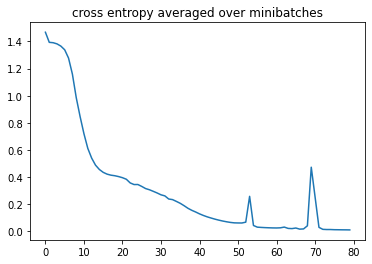

In [174]:
plt.title('cross entropy averaged over minibatches')
plt.plot(epoch_losses)
plt.show()

In [175]:
print(model.layers[0].apply_mod.linear.weight.size())
print(model.layers[1].apply_mod.linear.weight.size())
model.classify.weight.size()

torch.Size([256, 1])
torch.Size([256, 256])


torch.Size([4, 256])

### Get Testset data

In [208]:
testset = []
test_labels = []
test_dir = dir

testing_idx_1=[]
testing_idx_2=[]
testing_idx_3=[]
testing_idx_4=[]
for i in test_idx:
    testing_idx_1.append(i)
    testing_idx_2.append(i)
    testing_idx_3.append(i)
    testing_idx_4.append(i)
      
# print(testing_idx_1)
# print(training_idx_1)
# print(testing_idx_2)
# print(training_idx_2)
# print(testing_idx_3)
# print(training_idx_3)
# print(testing_idx_4)
# print(training_idx_4)

### Random Sample Nodes and Edges for Testing

## Set Percentage Keep

In [209]:
pct_keep = 1

In [210]:
for idx in range(len(testing_idx_1)):
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(testing_idx_1[idx])+"bit"+j+'.csv'
        filename2 = "cla_"+str(testing_idx_2[idx])+"bit"+j+'.csv'
        filename3 = "csa_"+str(testing_idx_3[idx])+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(testing_idx_4[idx])+"bit"+j+'.csv'
        
        if(filename.find("node_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        if(filename3.find("node_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    
    #randomly sample edges but keep all nodes
    
#     node_list_keep = random.sample(node_list,int(len(node_list)*pct_keep))
    node_list_keep = node_list
    edge_list_keep = random.sample(edge_list,int(len(edge_list)*pct_keep))
#     node_list2_keep = random.sample(node_list2,int(len(node_list2)*pct_keep))
    node_list2_keep = node_list2
    edge_list2_keep = random.sample(edge_list2,int(len(edge_list2)*pct_keep))
#     node_list3_keep = random.sample(node_list3,int(len(node_list3)*pct_keep))
    node_list3_keep = node_list3
    edge_list3_keep = random.sample(edge_list3,int(len(edge_list3)*pct_keep))
#     node_list4_keep = random.sample(node_list4,int(len(node_list4)*pct_keep))
    node_list4_keep = node_list4
    edge_list4_keep = random.sample(edge_list4,int(len(edge_list4)*pct_keep))
    
    #create dgl graph
    g=build_circuit_graph_undirected(node_list_keep,edge_list_keep)
    testset.append(g)
    test_labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2_keep,edge_list2_keep)
    testset.append(g2)
    test_labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3_keep,edge_list3_keep)
    testset.append(g3)
    test_labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4_keep,edge_list4_keep)
    testset.append(g4)
    test_labels.append(label_list4[0])

for i in test_labels:
    i[0] = int(i[0])

# print(test_labels)

In [211]:
##apply random shuffle on the testset    
np.random.seed(0)
randomize = np.arange(len(testset))
np.random.shuffle(randomize)
testset_shuffled=[]
test_labels_shuffled=[]
for i in range (len(randomize)):
    test_labels_shuffled.append(test_labels[randomize[i]])
    testset_shuffled.append(testset[randomize[i]])

### Test on Testset

In [212]:
# prediction=torch.zeros(len(testset),1,dtype=torch.float64)
# for iter, g in enumerate(testset):
#         pred = torch.zeros(1,4)
#         pred[0] = model(g)
#         probs_Y = torch.softmax(pred,1)
#         argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)
#         prediction[iter] = (argmax_Y.item()==test_labels[iter][0])
# #         print(probs_Y,argmax_Y.item(),test_labels[iter][0])

In [213]:
# print('Accuracy of argmax predictions on the test set: {:.4f}%'.format(
#     (prediction.cuda().sum().item() / len(testset)) * 100))

In [214]:
model.eval()
test_bg = dgl.batch(testset_shuffled)
test_labels_shuffled = torch.tensor(test_labels_shuffled).float().view(-1, 1).cuda()
# print(model(test_bg))
probs_Y = torch.softmax(model(test_bg), 1)

sampled_Y = torch.multinomial(probs_Y, 1)
argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_labels_shuffled == sampled_Y.float()).sum().item() / len(test_labels) * 100))
print('Accuracy of argmax predictions on the test set: {:.4f}%'.format(
    (test_labels_shuffled == argmax_Y.float()).sum().item() / len(test_labels) * 100))

# zip(model(test_bg),(test_labels))
# for i1,i2 in zip(probs_Y,(test_labels)):
#     print(i1,i2)
# print(torch.max(probs_Y, 1))

Accuracy of sampled predictions on the test set: 96.6667%
Accuracy of argmax predictions on the test set: 98.3333%


## Finish Testing

## Get Error Items

In [215]:
error = (test_labels_shuffled != argmax_Y.float()).nonzero()
print('Total', len(error),'errors out of',len(test_idx)*4,'test data')
for i in error.cpu().numpy():
    error_idx= i[0]
    print(probs_Y[error_idx],test_labels_shuffled[error_idx])
#     print(i[0])

Total 2 errors out of 120 test data
tensor([9.6042e-01, 5.3462e-07, 1.8419e-04, 3.9395e-02], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([9.8769e-01, 1.6210e-14, 1.2209e-02, 1.0262e-04], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')


In [216]:
test_accuracy = '{:4f}'.format((test_labels_shuffled == argmax_Y.float()).sum().item() / len(test_labels) * 100)

## Save Trained Model

In [217]:
from datetime import datetime

dateTimeObj = datetime.now()
 
timestampStr = dateTimeObj.strftime("%d-%b-%Y-%H:%M:%S")
 
print('Current Timestamp : ', timestampStr)

Current Timestamp :  19-May-2020-20:27:30


In [218]:
'4-class-model_{}-samples_{}-epoch_acc-'.format(sample_size,training_epoch)+test_accuracy+'_'+'{}-errs_'.format(len(error))+timestampStr


'4-class-model_10-samples_80-epoch_acc-98.333333_2-errs_19-May-2020-20:27:30'

In [219]:
#set model name:
model_name = '4-class-model_{}-samples_{}-epoch_acc-'.format(sample_size,training_epoch)+test_accuracy+'_'+'{}-errs_'.format(len(error))+timestampStr

SAVE_PATH = '/home/gpu-user-02/hdd/LT-user/Adder_Classification/main/models/' + model_name
torch.save(model.state_dict(), SAVE_PATH)

## Load Model

In [220]:
# model_name = '4class_1Sample_97.580645_0411'

SAVE_PATH = '/home/gpu-user-02/hdd/LT-user/Adder_Classification/main/models/' + model_name
model = Classifier(1, 256, 4)
model.load_state_dict(torch.load(SAVE_PATH))
model.cuda()
model.eval()

Classifier(
  (layers): ModuleList(
    (0): GCN(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=1, out_features=256, bias=True)
      )
    )
    (1): GCN(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=256, out_features=256, bias=True)
      )
    )
    (2): GCN(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=256, out_features=256, bias=True)
      )
    )
  )
  (classify): Linear(in_features=256, out_features=4, bias=True)
)

In [221]:
# (test_labels != argmax_Y.float()).nonzero()

## Visualize Activations

In [222]:
GCN1_act = []
GCN2_act = []
graph_emb = []
final_class = []

def get_activation_1(self,input,output):
#     print(output.size())
    GCN1_act.append(output.data.cpu().numpy())
    
def get_activation_2(self,input,output):
#     print(output.size())
    GCN2_act.append(output.data.cpu().numpy())
    
def get_activation_3(self,input,output):
#     print(output.size())
    graph_emb.append(input[0].cpu().detach().numpy())
    final_class.append(output.data.cpu().numpy())

In [223]:
h1 = model.layers[0].register_forward_hook(get_activation_1)
h2 = model.layers[1].register_forward_hook(get_activation_2)
h3 = model.classify.register_forward_hook(get_activation_3)

for i in range(len(testset)):
    out = model(testset[i])

In [224]:
len(GCN1_act),len(GCN2_act),len(graph_emb),len(final_class)

(120, 120, 120, 120)

In [225]:
GCN1_act_vis_ls = []
GCN2_act_vis_ls = []
graph_emb_vis_ls = []
final_class_vis_ls = []

for i in range(len(GCN1_act)):
    GCN1_act_vis_ls.append(np.expand_dims(np.mean(GCN1_act[i],axis=0),axis=0))
    GCN2_act_vis_ls.append(np.expand_dims(np.mean(GCN2_act[i],axis=0),axis=0))
    graph_emb_vis_ls.append(np.expand_dims(graph_emb[i],axis=0))
    final_class_vis_ls.append(np.expand_dims(final_class[i],axis=0))

In [226]:
GCN1_act_vis = np.concatenate(GCN1_act_vis_ls, axis=0)
GCN2_act_vis = np.concatenate(GCN2_act_vis_ls, axis=0)
graph_emb_vis = np.concatenate(graph_emb_vis_ls, axis=0)
final_class_vis = np.concatenate(final_class_vis_ls, axis=0)

In [227]:
GCN1_act_vis.shape,GCN2_act_vis.shape,graph_emb_vis.shape,final_class_vis.shape

((120, 256), (120, 256), (120, 1, 256), (120, 1, 4))

In [228]:
# GCN1_act[0].size(),GCN2_act[0].size(),graph_emb[0].size(),final_class[0]

In [231]:
import tsne
vis1 = tsne.tsne(GCN1_act_vis, 2, 30)
vis2 = tsne.tsne(GCN2_act_vis, 2, 30)
vis3 = tsne.tsne(graph_emb_vis[:,0,:], 2, 30)
vis4 = tsne.tsne(final_class_vis[:,0,:], 2, 30)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 120...
Mean value of sigma: 0.739457
Iteration 10: error is 9.447112
Iteration 20: error is 7.888162
Iteration 30: error is 9.545093
Iteration 40: error is 8.854505
Iteration 50: error is 8.722741
Iteration 60: error is 8.359748
Iteration 70: error is 8.319552
Iteration 80: error is 8.186769
Iteration 90: error is 8.292835
Iteration 100: error is 8.313299
Iteration 110: error is 0.828865
Iteration 120: error is 0.407720
Iteration 130: error is 0.177043
Iteration 140: error is 0.083885
Iteration 150: error is 0.058700
Iteration 160: error is 0.054606
Iteration 170: error is 0.052554
Iteration 180: error is 0.051172
Iteration 190: error is 0.049930
Iteration 200: error is 0.049157
Iteration 210: error is 0.048727
Iteration 220: error is 0.048501
Iteration 230: error is 0.048392
Iteration 240: error is 0.048299
Iteration 250: error is 0.048191
Iteration 260: error is 0.048104
Iteration 27

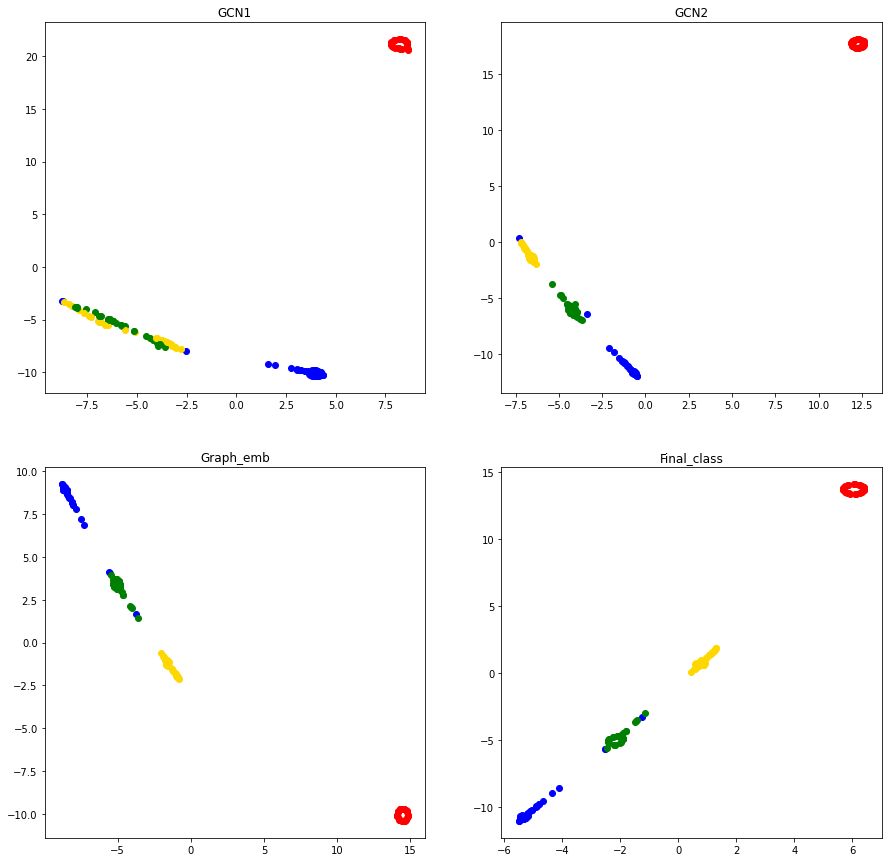

In [232]:
fig, axs = plt.subplots(2,2,figsize=(15,15))

# color = test_labels.cpu()*85/255

#class 0: cla 'green'
#class 1: rca 'red'
#class 2: csla 'blue'
#class 3: cska 'gold'

color = []
# marker = []

for i in range(len(test_labels)):
    if test_labels[i] == [0]:
        color.append('green')
#         marker.append('.')
    if test_labels[i] == [1]:
        color.append('red')
#         marker.append('^')
    if test_labels[i] == [2]:
        color.append('blue')
#         marker.append('v')
    if test_labels[i] == [3]:
        color.append('gold')
#         marker.append('s')

axs[0,0].set_title('GCN1')
axs[0,1].set_title('GCN2')
axs[1,0].set_title('Graph_emb')
axs[1,1].set_title('Final_class')
for i in range (len(test_labels)):
#     axs[0,0].scatter(vis1[i,0],vis1[i,1],color=(0,color[i],0))
#     axs[0,1].scatter(vis2[i,0],vis2[i,1],color=(0,color[i],0))
#     axs[1,0].scatter(vis3[i,0],vis3[i,1],color=(0,color[i],0))
#     axs[1,1].scatter(vis4[i,0],vis4[i,1],color=(0,color[i],0))
    axs[0,0].scatter(vis1[i,0],vis1[i,1],color=color[i])
    axs[0,1].scatter(vis2[i,0],vis2[i,1],color=color[i])
    axs[1,0].scatter(vis3[i,0],vis3[i,1],color=color[i])
    axs[1,1].scatter(vis4[i,0],vis4[i,1],color=color[i])
#     axs[0,0].scatter(vis1[i,0],vis1[i,1],color=color[i],marker=marker[i])
#     axs[0,1].scatter(vis2[i,0],vis2[i,1],color=color[i],marker=marker[i])
#     axs[1,0].scatter(vis3[i,0],vis3[i,1],color=color[i],marker=marker[i])
#     axs[1,1].scatter(vis4[i,0],vis4[i,1],color=color[i],marker=marker[i])

plt.show()

## End